# Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import joblib

# Load Data

In [8]:
# df = pd.read_csv("../data/reduced_features_has_disease.csv")

# X = df.drop(["has_disease"], axis=1)
# y = df["has_disease"]

# Load PCA-transformed train/test data
train_df = pd.read_csv("../data/pca_train.csv")
test_df = pd.read_csv("../data/pca_test.csv")

X_train = train_df.drop(columns=["has_disease"])
y_train = train_df["has_disease"]

X_test = test_df.drop(columns=["has_disease"])
y_test = test_df["has_disease"]

# Train-test split

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save training and test data
# joblib.dump(X_train, "../data/X_train.pkl")
# joblib.dump(X_test, "../data/X_test.pkl")
# joblib.dump(y_train, "../data/y_train.pkl")
# joblib.dump(y_test, "../data/y_test.pkl")

# Models + Results array

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

results = []

# Train & evaluate

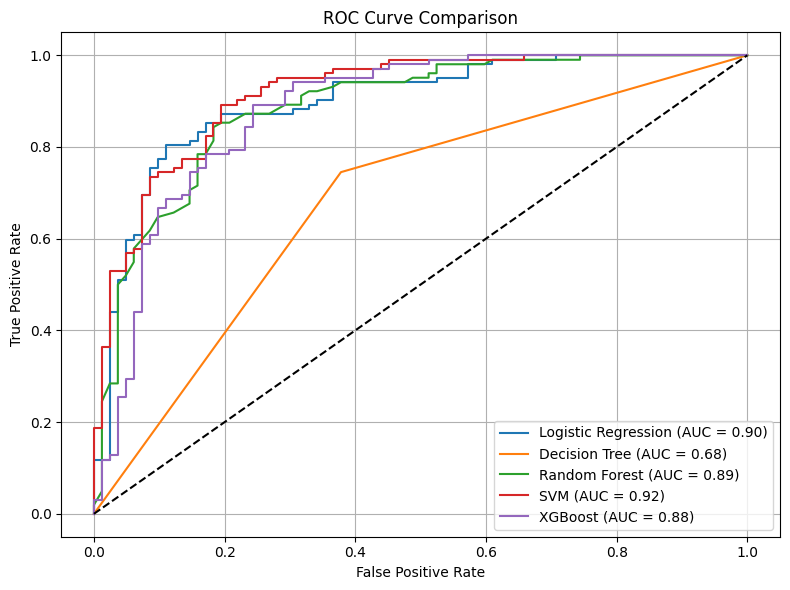

In [11]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Append results
    results.append([name, acc, prec, rec, f1, auc])


plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Show metric table + Save models (PCA and selected features)

In [12]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("✔️ Performance Metrics:\n")
print(results_df.sort_values(by="AUC", ascending=False).reset_index(drop=True))

# for name, model in models.items():
#     model.fit(X_train, y_train)
    # joblib.dump(model, f"../models/all_models/{name}.pkl")
    # joblib.dump(model, f"../models/all_models/{name}_PCA.pkl")
    # print(f"Saved {name} model.")

✔️ Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0                  SVM  0.842391   0.823009  0.911765  0.865116  0.916069
1  Logistic Regression  0.815217   0.809091  0.872549  0.839623  0.897537
2        Random Forest  0.809783   0.801802  0.872549  0.835681  0.886657
3              XGBoost  0.815217   0.798246  0.892157  0.842593  0.880918
4        Decision Tree  0.690217   0.710280  0.745098  0.727273  0.683525
